This code contains 4 classification modelels

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # To Scale the features

from imblearn.over_sampling import RandomOverSampler # To balance the dataset

#**Dataset citation:**

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [13]:
df = pd.read_csv('/content/magic04.data')

Checking the data

In [14]:
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


Assigning names to the columns

In [15]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df.columns = col_names

Converting 'class' column into binary values

In [16]:
df['class'] = (df['class']=='g').astype(int)

In [17]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,1
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,1
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,1
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,1
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,1


#Plot
Plotting a histogram to get a general idea of the probabilities

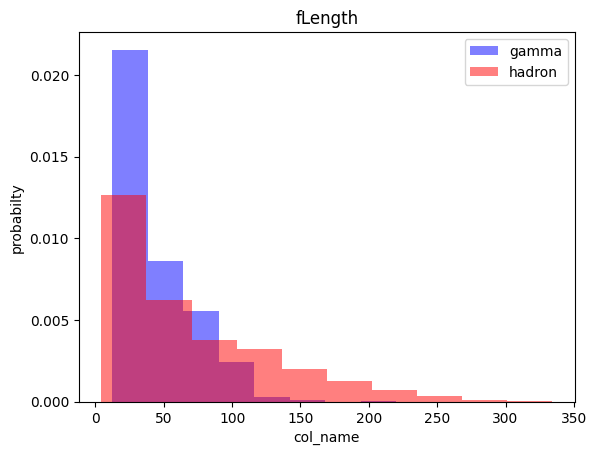

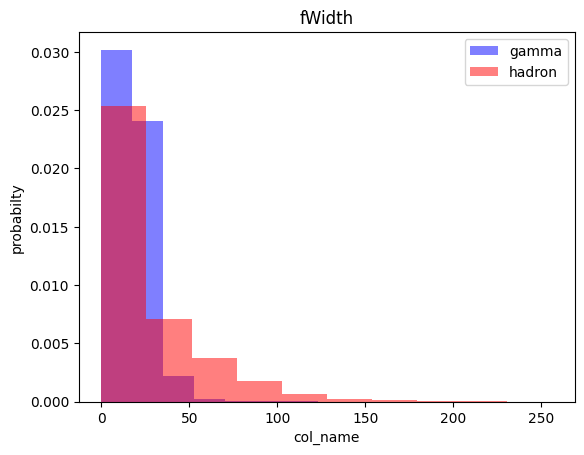

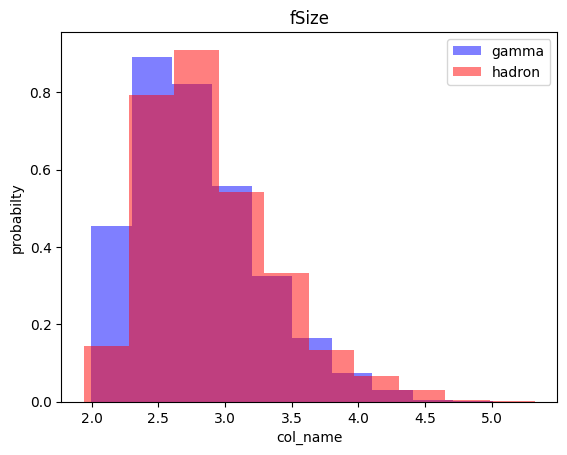

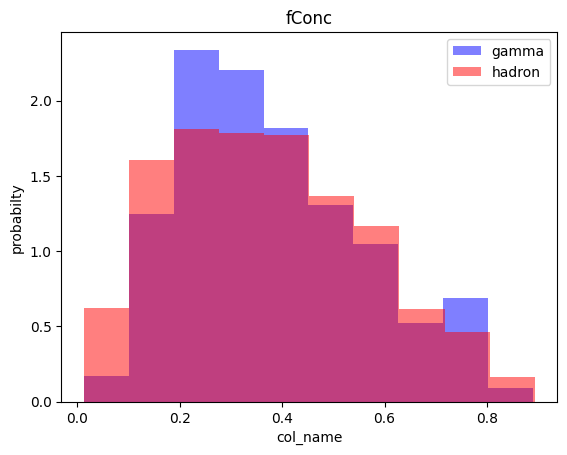

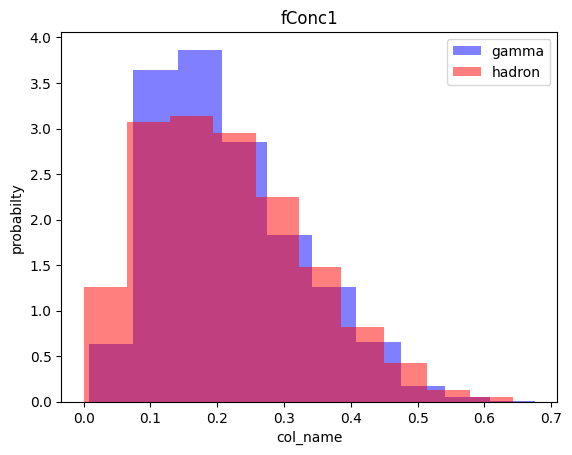

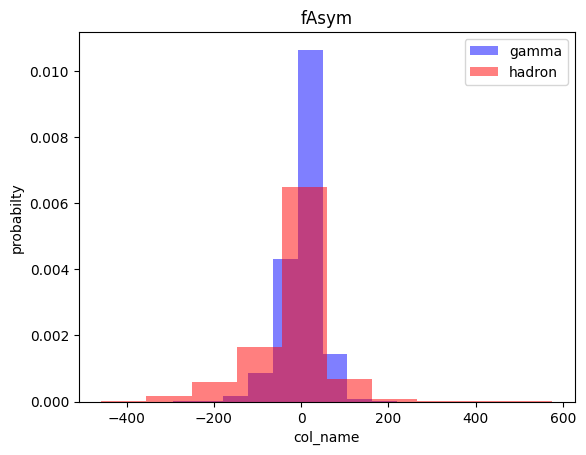

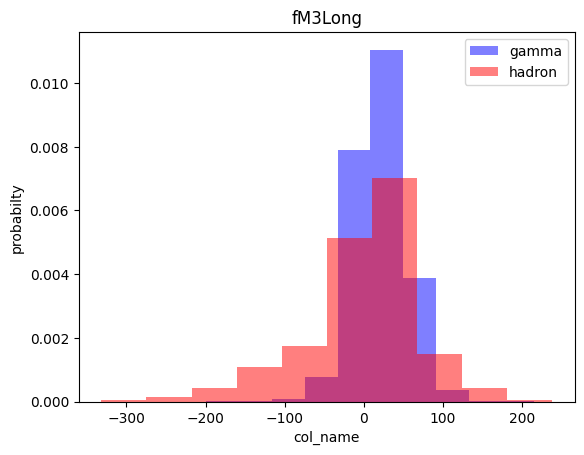

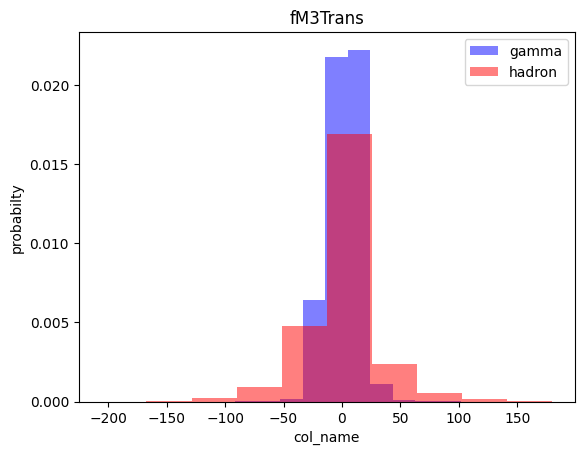

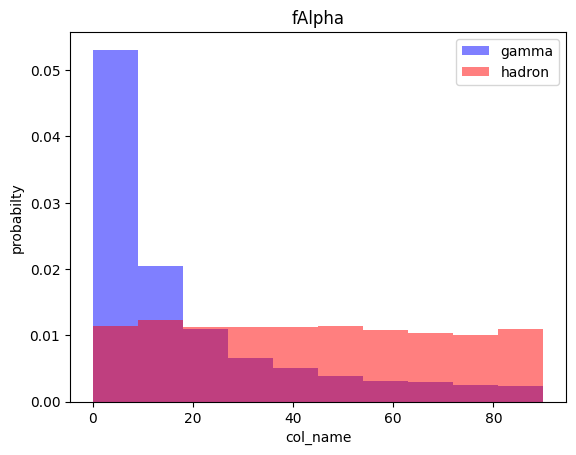

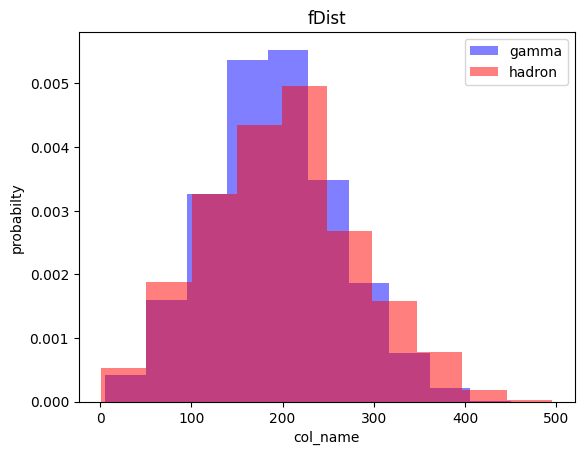

In [18]:
for col_name in df.columns[:-1]:
  plt.hist(df[df['class']==1][col_name], label='gamma', color='blue', alpha=0.5, density=True)
  plt.hist(df[df['class']==0][col_name], label='hadron', color='red', alpha=0.5, density=True)
  plt.title(col_name)
  plt.ylabel('probabilty')
  plt.xlabel('col_name')
  plt.legend()
  plt.show()

# **Creating the Training, Validation and Testing datasets**


*   **Training Dataset** - 0 to 60% of the rows
*   **Validation Dataset** - rows between 60% and 80%
*   **Testing Dataset** - rows from 80% to 100%





In [48]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# **Preparing data**


*   Slicing Data

*   Scaling Features

*   Over Sampling



In [46]:
def prepare_data(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values  # Features
  y = dataframe[dataframe.columns[-1]].values # Outcome column

  # Scaling
  scaler = StandardScaler() # Creating a StandardScaler Object
  x = scaler.fit_transform(x) # Scaling the features

  # Over-Sampling
  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  # Y is 1D and not 2D like X, so we reshape it to 2D.
  data = np.hstack((x, np.reshape(y, (-1,1))))

  return data, x, y

Defining the training, validation and testing datasets

In [49]:
train, x_train, y_train = prepare_data(train, oversample=True)
valid, x_valid, y_valid = prepare_data(valid, oversample=False)
test, x_test, y_test = prepare_data(test, oversample=False)

# **kNN Model**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model = KNeighborsClassifier(5)
knn_model = knn_model.fit(x_train, y_train)

In [37]:
y_pred = knn_model.predict(x_test)

- One time use if classification_report() doesn't work

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1400
           1       0.84      0.86      0.85      2404

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# **Naive Bayes Model**

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb_model = GaussianNB()

In [42]:
nb_model = nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1400
           1       0.72      0.89      0.80      2404

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.70      0.71      0.69      3804



# **Logistic Regression Model**

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lgrs_model = LogisticRegression()

In [50]:
lgrs_model = lgrs_model.fit(x_train, y_train)
y_pred = lgrs_model.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1306
           1       0.85      0.82      0.84      2498

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# **SVM - Support Vector Machines Model**

In [53]:
from sklearn.svm import SVC

In [54]:
svm_model = SVC()

In [55]:
svm_model = svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1306
           1       0.89      0.90      0.90      2498

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

